# Homework 08
## Brown University
## DATA 1010
## Fall 2020

In [2]:
using Pkg
Pkg.activate(".")
Pkg.add(["Plots", "Distributions", "JSON", "JSONTables", "DataFrames", "StatsBase", "TextAnalysis"])

 Activating environment at `~/Graduate/Data-1010/problem-sets/homework/hw08/Project.toml`
   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed AbstractTrees ── v0.2.1
  Installed CodecZlib ────── v0.6.0
  Installed JSONTables ───── v1.0.0
  Installed Juno ─────────── v0.7.2
  Installed TextAnalysis ─── v0.6.0
  Installed DataFrames ───── v0.21.8
  Installed HTML_Entities ── v1.0.0
  Installed Distributions ── v0.24.2
  Installed Languages ────── v0.4.3
  Installed ZipFile ──────── v0.8.4
  Installed Tracker ──────── v0.2.12
  Installed Adapt ────────── v1.1.0
  Installed JSON3 ────────── v1.4.0
  Installed WordTokenizers ─ v0.5.6
  Installed Colors ───────── v0.9.6
  Installed StrTables ────── v1.0.1
  Installed FillArrays ───── v0.10.0
  Installed Flux ─────────── v0.8.3
  Installed StaticArrays ─── v0.12.5
  Installed NNlib ────────── v0.6.6
No Changes to `~/G

In [1]:
using Plots, Distributions
default(fontfamily = "Palatino")

## Problem 1

Write a summary, in your own words, of the statistical learning theory framework we're using in this course. Here are some points you should cover:

- What kinds of problems is statistical learning intended to solve?
- What are some different names people use for the input variables?
- What are some different names people use for the output variables?
- What's the difference between regression and classification?
- What's a loss functional?
- What is the regression function? What's the difference between the regression function and terms of the form "*adjective* regression" (like linear regression, Nadaraya-Watson regression, etc.)? 
- Complete the analogy: the regression function is to a regression problem as the ______ is to a classification problem?
- What is the empirical risk minimizer?
- Is it correct that generalization error is defined in terms of the behavior of the model on a withheld subset of the training data? (Hint: this is *incorrect*, but in a subtle way; explain this detail.)
- What is inductive bias, and what are some ways to introduce it?
- What does the no-free-lunch theorem tell us about inductive bias?

Use examples, where appropriate, to illustrate your points. When you do choose examples, always use ones which are different from the ones used in the first section of the Data Gymnasia Machine Learning course.

Note that you should *not* answer the above questions bullet by bullet. Weave your answers into a coherent narrative.

(Solution 1)

**Summary**  
Statistical learning tends to solve the statistic problem because it is to draw conclusions about the unknown probability $\mathbb{P}$ based observations $(X, Y)$ sampled from measure. It is aimed to find the prediction function $h$ to predict dependent variable $Y$ given one or more independent variables $X$. The input variables $X$ are also called features and predictors. The output variable $Y$ is also called response variable or target variable. Regression's traget variable is continuous while classification's is categorical.

A loss function is a function that we use to calculate the loss from a learning algorithm on a set of data. We can judge the model's performance during training by the loss functional. The loss functional $L(h)$ is a good indicator, which is used to defining a loss (or risk, or error). The prediction function $h$ with smaller loss is better. The common loss functional uses mean squared error for regression function and uses misclassification probability for classification.

The prediction function $h$ for regression problem is regression function, which is to estimate the relationships between input variables $X$ and output variable $Y$. Regression function includes many terms of the form "adjective regression" which fit the data according to a specific mathematical criterion. For example, linear regression fits the data with a line, and Nadaraya-Watson regression aims to find a non-linear relation between $X$ and $Y$. Similarly, the classfier is to a classification problem as the regression function is to a regression problem.

The generalization error is defined in terms of behavior on the test data. If the model overfits the train_data, it might not perform very well on test data because it does not have a very good generalization ability. Inductive bias is created by model producers who intend to ignore some categories of data during training so that the model will be trained to face the unseen data during test. We could introduce it by (1)using a restrictive class $\mathcal{H}$ of candidate functions, (2)regularizing, and (3)cross-validating. The no free lunch theorem tells us that there is always a trade off between some achievements and another set of achievements. In this case, inductive bias can lead to underfitting and it is used to mitigate overfitting. When we build more inductive bias, the model would be less complex, and tends to be smooth. Thus, the model with high bias tends to be underfitting. When we build less inductive bias, the model would be more complex to fit every data points. Thus the model with low bias tends to be overfitting. 

## Problem 2

Consider a fire alarm which uses a heat sensor as a trigger. Let $t$ be the age of the alarm, in months. When the sensor detects heat, the measured voltage from its diodes follows the normal distribution $\mathcal{N}(1, \frac{t}{360})$. When it does not, the voltage has the distribution $\mathcal{N}(0, \frac{t}{360})$.  This alarm will go off whenever it detects a voltage above a given threshold $V$. For simplicity, you can assume that this device is only used once a month instead of continuously.

(a) Find the probability that the alarm will err in the first twelve months (failing to sound when it should, or sounding when it shouldn't), assuming a threshold of $V = 0.5$.

Hint: the answer is so incredibly small that you might need to use bignums, depending on how you got about it.

t = 360 and $\frac{t}{360} = 1$

Error case 1: Failing to sound when it should, the voltage distribution is $\mathcal{N}(1, \frac{t}{360})$ while V = 0.5. The $P(V \lt 0.5) =3.671e-51$

Error case 2: sounding when it shoudn't, the vaoltage distbribution is $\mathcal{N}(0, \frac{t}{360})$ while V = 0.5. The $P(V \gt 0.5) =0.3.671e-51$

The total is $0.7.342e-51$

In [27]:
case1 = 1
case2 = 1
for i in 1:12
    case1*=1-cdf(Normal(1, BigFloat(i/360)), 0.5)
    case2*=big(cdf(Normal(0, BigFloat(i/360)), 0.5))
end
1-case1,1-case2,1-case1*case2

(3.670966201051387062819904294726190427476743718484158480861627256999787340694451e-51, 3.670966201051387062819904294726190427476743718484158480861627256999787340694451e-51, 7.341932402102774125639808589452380854953487436968316961723254513999574681388902e-51)

(b) A test is scheduled five years into the device's lifecycle. Draw the ROC curve at the five-year mark (bearing in mind that the value $V$ can be varied).

In [51]:
Pkg.build("GR")

   Building GR → `~/.julia/packages/GR/yMV3y/deps/build.log`


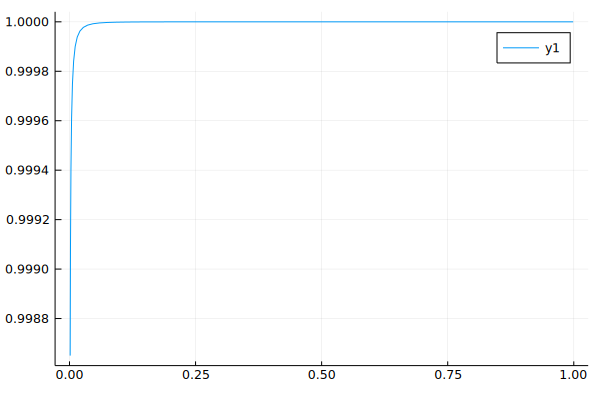

In [28]:
fpr(v) = 1 - cdf(Normal(0, BigFloat(60/360)), v)
dr(v) = 1 - cdf(Normal(1, BigFloat(60/360)), v)
step = 0.02
ROC() = [(fpr(v), dr(v)) for v in -0.5:step:0.5]
ys = [dr(v) for v = -0.5:step:0.5]
xs = [fpr(v) for v = -0.5:step:0.5]
plot(ROC())

(c) The manufacturers of this device has decided that when a mistake occurs, a false alarm is more acceptable than a false negative. Moreover, they wish to control the rates of false alarms to false positives at 10 to 1, to avoid the boy-who-cried-wolf effect. For $t = 5$ years, can you give a value of $V$ that satisfies this condition? Will the best $V$ change as a function of device age?

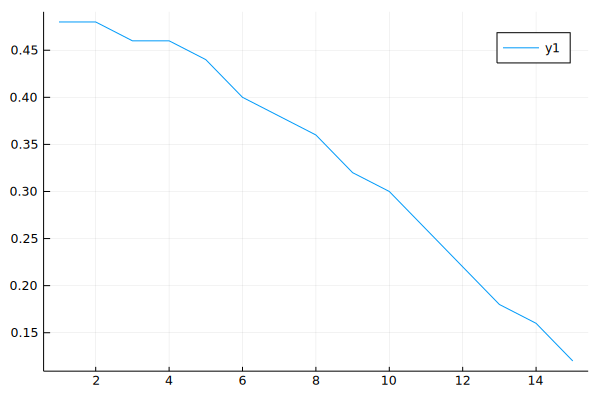

In [29]:
t = 5
fpr(v, t) = 1 - cdf(Normal(0, BigFloat(t*12/360)), v)
dr(v, t) = 1 - cdf(Normal(1, BigFloat(t*12/360)), v)
fner(v, t) = cdf(Normal(1, BigFloat(t*12/360)), v)
ts = [maximum([v for v = -0.5:0.02:0.5 if fpr(v,t)/fner(v,t) >= 10]) for t = 1:15]
plot(ts)
# print(ts)

For t = 5 years, V < 0.4 will give a rate 10:1; The best V change as a function of device age.

(d) Draw an assortment of ROC curves with different $t$'s, using appropriate spacing between the times plotted. When will be the first time that the AUROC is below 0.81? 

Riemann sum: 0.8053982586723012908657983340984273858587472201495616429087007885020995029811788 below 0.81: 24


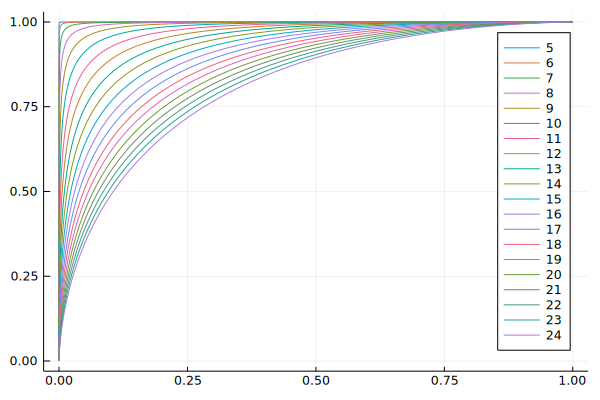

In [30]:
fpr(v, t) = 1 - (cdf(Normal(0, BigFloat(t*12/360)), v))
dr(v, t) = 1 - cdf(Normal(1, BigFloat(t*12/360)), v)
step = 0.02
plot()
for t = 5:1:30
    ROCs = sort([(fpr(v, t), dr(v, t)) for v in -2:step:3])
    Riemann_sum = sum([(ROCs[i][2] + ROCs[i-1][2])/2 * (ROCs[i][1] - ROCs[i-1][1]) for i in 2:length(ROCs)])
    plot!(ROCs, label=t)
    if Riemann_sum < 0.81
        println("Riemann sum: ", Riemann_sum, " below 0.81: ", t)
        break
    end
end
plot!()

(solution d) When t = 24, we get AUROC score below 0.81 for the first time

## Problem 3

Please show all your answers as scatter plots, labeling the classes by color. For simplicity, the notions of success and failure described in each part can be measured by misclassification error.

(a) Construct one example of a binary classification problem defined on $[0, 1] \times [0, 1]$ with around $100$ data points where QDA would perform very nicely, but a Naive Bayes version of QDA would fail.

(b) Construct one example of a binary classification problem defined on $[0, 1] \times [0, 1]$ with around $100$ data points where some Naive Bayes model (one you should specify) would perform very nicely, but QDA would fail.

(c) Is it possible to construct an example with the same conditions as above in which QDA would be successful but LDA will not? What about the other way around?

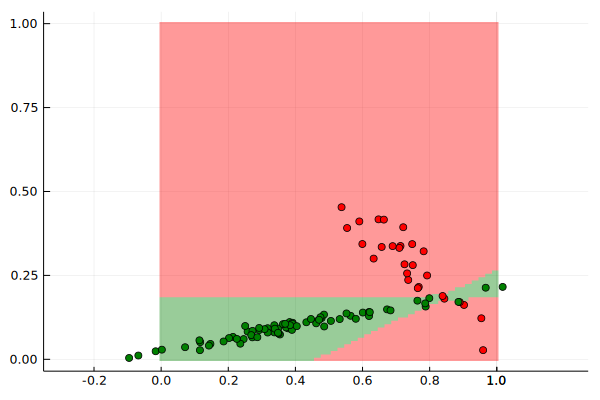

In [2]:
using Plots, StatsBase, Distributions, Random
Random.seed!(123)
struct Flower
    X::Vector
    color::String
end
# density function for the normal distribution N
xgrid = 0:0.01:1
ygrid = 0:0.01:1
As = [[0.05 -0.1; 0 0.1],[0.05 0.25; 0 0.05]]
μs = [[0.7,0.3],[0.4,0.1]]
Ns = [MvNormal(μ,A*A') for (μ,A) in zip(μs,As)]
p = ProbabilityWeights([1/3, 2/3])
colors = ["red","green"]
function randflower(μs,As)
    i = sample(p)
    Flower(As[i]*randn(2)+μs[i],colors[i])
end
flowers = [randflower(μs,As) for i in 1:100]
predict_qda(x,p,Ns) = argmax([p[i]*pdf(Ns[i],x) for i in 1:2])

function classificationplot(flowers,p,Ns)
    rgb = [:red,:green]
    P = heatmap(xgrid,ygrid,(x,y) -> predict_qda([x,y],p,Ns),
          fillcolor = cgrad(rgb), opacity = 0.4,
          aspect_ratio = 1, legend = false)
    for c in ["red","green"]
        scatter!(P,[(F.X[1],F.X[2]) for F in flowers if F.color==c], color=c)
    end
    P
end
correct(flowers,p,Ns) = count(colors[predict_qda(F.X,p,Ns)] == F.color for F in flowers)
classificationplot(flowers, p, Ns)

In [3]:
using DataStructures
mutable struct NBBinaryClassifier
    classes
    class_proportions
    conditional_measures
end
function fit!(N::NBBinaryClassifier, X, y)
    N.class_proportions = proportionmap(y)
    probability_dict(j) = [merge!(DefaultDict(0), proportionmap(X[y .== j][i])) 
                                for i in 1:size(X[y .== j],1)]
    N.conditional_measures = Dict(j => probability_dict(j) for j in N.classes)
    nothing
end
function predict_nbb(N::NBBinaryClassifier, x)
    loglikelihood(j) = (log(N.class_proportions[j]) + 
        sum([log(N.conditional_measures[j][i][x[i]]) for i in 1:length(x)]))
    N.classes[argmax([loglikelihood(j) for j in N.classes])]
end
N = NBBinaryClassifier(colors,Dict(),Dict())
x_train = [i.X for i in flowers]
y_train = [i.color for i in flowers]
fit!(N, x_train, y_train)
accuracy = [predict_nbb(N, x_train[i]) == y_train[i] for i in 1:length(x_train)]
println("NBB accuracy: ",proportionmap(accuracy)[true])
println("QDA accuracy: ",correct(flowers,p,Ns)/length(flowers))

NBB accuracy: 0.27
QDA accuracy: 0.97


(solution a) From the above two tests, we can find out that the QDA has an accuracy of 0.97 while Navie Bayes only has 0.27.

NBB accuracy: 0.8
QDA accuracy: 0.55


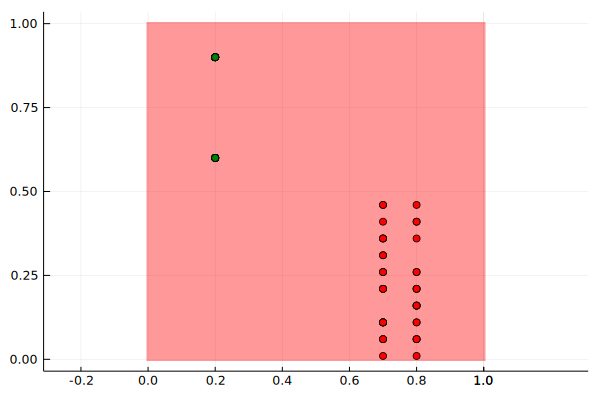

In [115]:
Random.seed!(12)
function generate_points()
    point_x = rand(Uniform(0,1))
    point_y = rand(Uniform(0,1))
    if point_x < point_y
        return Flower([point_x, point_y], "red")
    else
        return Flower([point_x, point_y], "green")
    end
end
function generate_points2()
    if rand(Bernoulli(0.5))
        return Flower([rand(0.7:0.1:0.8), rand(0.01:0.05:0.5)], "red")
    else
        if true#rand(Bernoulli(0.5)) == 1
            return Flower([rand(0.2:0.35), rand([0.6,0.9])], "green")
        else
            return Flower([rand(0.6:0.05:1), rand(0.1:0.05:0.8)], "green")
        end
    end
end
flowers = [generate_points2() for i in 1:80]
reds = [i.X for i in flowers if i.color=="red"]
greens = [i.X for i in flowers if i.color=="green"]
p = ProbabilityWeights([length(reds)/100, length(greens)/100])
As = [cov(reds),cov(greens)]
μs = [mean(reds), mean(greens)]
Ns = [MvNormal(μ,A*A') for (μ,A) in zip(μs,As)]
x_train = [i.X for i in flowers]
y_train = [i.color for i in flowers]
N_li = NBBinaryClassifier(colors,Dict(),Dict())
fit!(N_li, x_train, y_train)
accuracy = [predict_nbb(N_li, x_train[i]) == y_train[i] for i in 1:length(x_train)]
println("NBB accuracy: ",proportionmap(accuracy)[true])
println("QDA accuracy: ",correct(flowers,p,Ns)/length(flowers))
classificationplot(flowers, p, Ns)

(solution b) In this example, points are generated using funtion generate_points2(). We get two groups of points that only Naive Bayes performs nicely but QDA fails.

(solution c) If the boundary between two classes is linear, then LDA and QDA can both perform very well. However, if the boundary is non-linear, LDA will fail but QDA can still perform well. Therefore, it is possible to construct an example where QDA is successful but LDA is not, but not the other way around.

## Problem 4

In this problem we'll learn about *empirical* ROC curves. This is an important topic because in practice you won't know the data-generating probability measure and therefore will not be able to compute the theoretical ROC curve. But you still need to  be able to establish the approximate spectrum of options for the tradeoff between detection rate and false alarm rate.

The code below, which comes from the pre-class notebook for Day 19, shows an example using some simulated data:

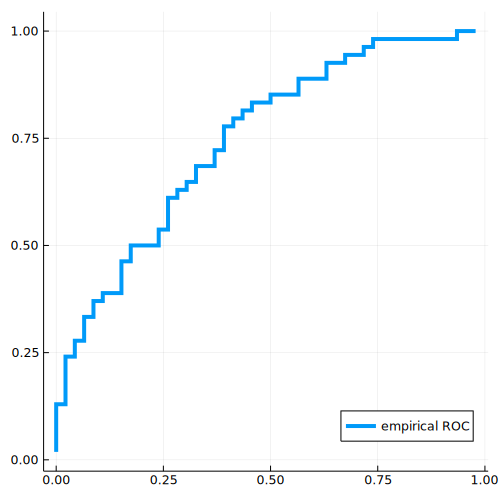

In [4]:
n = 100
neg = []
pos = []
for i = 1:n
    if rand(Bernoulli(0.5))
        push!(neg, rand(Normal(0, 1)))
    else
        push!(pos, rand(Normal(1, 1)))
    end
end
obs = sort([pos; neg])
critical_xs = 0.5(obs[1:end-1] + obs[2:end])
DR(neg, pos, x) = count(pos .> x) / length(pos)
FAR(neg, pos, x) = count(neg .> x) / length(neg)
plot([(FAR(neg, pos, x), DR(neg, pos, x)) for x in critical_xs], linewidth = 4, 
      legend = :bottomright, ratio = 1, size = (500, 500), label = "empirical ROC")

(a) Explain what this code is doing. I recommend watching the [pre-class video](https://youtu.be/NbHE_hokUTE) for details. 

This code simulates the alarm system in problem 2. First of all, it randoms the happening of an emergency by Brenoulli distribution with p = 0.5, so that we have approximately 50 elements representing positive events in pos and also 50 in neg representing negative events. In neg, we generate a random value from N(0,1) and in pos we generate a random value from N(1,1). Then we sort the observations in pos and neg repectively. We set an array of 99 thresholds and plot the detection rate and false alarm rate for each of the threshold in "critical_xs".

(b) Sometimes the approach illustrated above in inadequate. For example, consider the following data: 

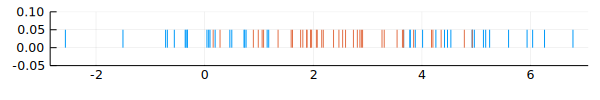

In [5]:
neg = [[rand(Normal(0, 1)) for _ in 1:20]; [rand(Normal(5, 1)) for _ in 1:20]]
pos = [rand(Normal(2.5, 1)) for _ in 1:40]
sticks([(x, 0.05) for x in neg], ylims = (-0.05, 0.1), size = (600, 100), legend = false)
sticks!([(x, 0.05) for x in pos])

These data are quite well separated spatially, and the ROC curve should therefore get pretty well into the upper left corner. However, if you apply the approach in (a), that is not what you'll find: 

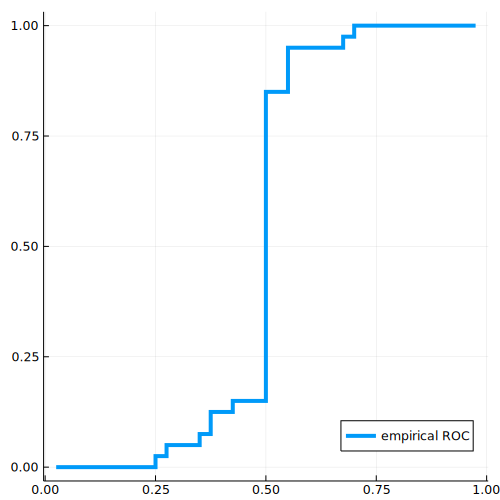

In [6]:
obs = sort([pos; neg])
critical_xs = 0.5(obs[1:end-1] + obs[2:end])
plot([(FAR(neg, pos, x), DR(neg, pos, x)) for x in critical_xs], linewidth = 4, 
      legend = :bottomright, ratio = 1, size = (500, 500), label = "empirical ROC")

Describe a strategy for handling this kind of situation better.

We can see that the postive data points concentrate around 2.5 while the negative data points have 2 concetrations, on 0 and 5. In this case, we can set the critical_x to be the difference betwen the 0.5(obs[1:end-1] + obs[2:end]) and the mean of critical_xs. The resulting plot is as follows:

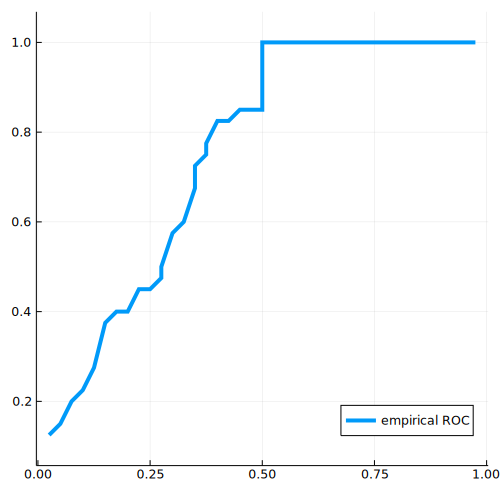

In [7]:
obs = sort([pos; neg])
critical_xs = 0.5(obs[1:end-1] + obs[2:end])
plot([(FAR(neg, pos, x), DR(neg, pos, x - mean(critical_xs))) for x in critical_xs], linewidth = 4, 
      legend = :bottomright, ratio = 1, size = (500, 500), label = "empirical ROC")

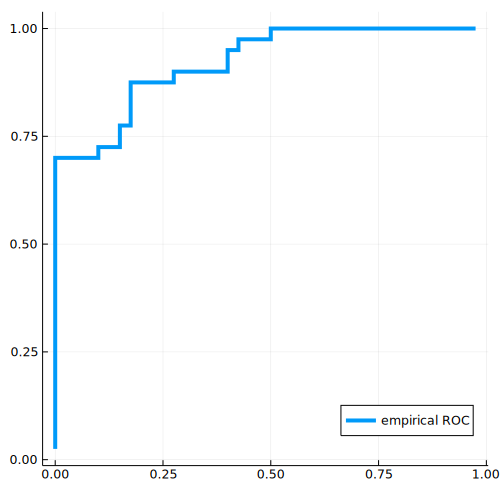

In [14]:
pos_new = -abs.(pos .- 2.5)
neg_new = -abs.(neg .- 2.5)
obs_new = sort([pos_new; neg_new])
critical_xs = 0.5(obs_new[1:end-1] + obs_new[2:end])
plot([(FAR(neg_new, pos_new, x), DR(neg_new, pos_new, x)) for x in critical_xs], linewidth = 4, 
      legend = :bottomright, ratio = 1, size = (500, 500), label = "empirical ROC")

## Problem 5

Explain why the ROC curves should really be concave. 

*Hint: given any two points on the ROC curve, the points on the line segment connecting them are all accessible, for a very similar reason to what we discussed in class about how the ROC curve should lie above the diagonal of the square.*

The ROC curve plots false alarm rate on x and dectection rate as y according to a specific critical threshold. When the critical threshold decrease, the false alarm rate will and dectection rate will both increase. If the ROC curve is not concave, there must exist two points in between which a point is below the line segment of them. At that point, we can simply reverse the way we predict the classes. For example, if it is a binary classifictaion, we can change our original prediction from true to false for class a and false to true for class b and we will get a point on ROC that is higher than that line segment. Threfore, the ROC curves should be concave as we can always find a way of makeing better predidctions if it is not.

## Problem 6

In this problem, we are going to use the Naive Bayes method to generate some predictions on text data. Here the [dataset](https://nijianmo.github.io/amazon/index.html#subsets) we use comes from reviews on [Amazon.com](www.amazon.com) for their products in Toys and Games.

For your reference, we will provide some code below for you to pull the data from a json file:

In [8]:
using JSON, JSONTables
using DataFrames

The size of this dataset exceeds Github's limitations, please download it from either the link provided two cells above, or using this [Google Drive link](https://drive.google.com/file/d/1XrAeVwuW5gWMx1oDgNAFaMDxbdbDSEl9/view?usp=sharing). Be sure to use your Brown email address to access this file.

In [9]:
f = open("Toys_and_Games_5.json")
df = DataFrame(reviewText = [], overall = [])
while (! eof(f))
    line = readline(f)
    if line != ""
        push!(df, JSON.parse(line))
    end
end

In [10]:
df[1:5, :]

,reviewText
,Any
1,I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters.
2,Love the magnet easel... great for moving to different areas... Wish it had some sort of non skid pad on bottom though...
3,"Both sides are magnetic. A real plus when you're entertaining more than one child. The four-year old can find the letters for the words, while the two-year old can find the pictures the words spell. (I bought letters and magnetic pictures to go with this board). Both grandkids liked it a lot, which means I like it a lot as well. Have not even introduced markers, as this will be used strictly as a magnetic board."
4,"Bought one a few years ago for my daughter and she loves it, still using it today. For the holidays we bought one for our niece and she loved it too."
5,I have a stainless steel refrigerator therefore there are not much space for my son to play with his magnet. Brought this for him to put his magnet on. He enjoys sticking his magnet on it. Great to have so he can play with his alphabet magnets.


One of the columns might be omitted in the above results. The original dataframe contains more columns, but the only ones we will deal with in this problem is `reviewText` and `overall`. In Amazon's system, `overall` is the 1-5 star score provided by the reviewer to accompany their review. We will train our Naive Bayes model on most of the data, while using the remaining data as a test set to see if we can predict the `overall` score using only the text.

In [119]:
names(df)

2-element Array{String,1}:
 "reviewText"
 "overall"

As well as a preprocessing function:

In [11]:
using TextAnalysis, Plots, StatsBase

"""
Given a string s, return a list comprised of words that make up this string.
Some alterations, like removal of plural and tense, may be applied.
"""
function preprocess(s)
    message = remove_corrupt_utf8(s)
    patterns = [:html => (r"<[^<>]+>", " "),
                :number => (r"[0-9]+", "number"),
                :url => (r"(http|https)://[^\s]*", "httpaddr"),
                :email => (r"[^\s]+@[^\s]+", "emailaddr"),
                :dollar => (r"[$]+", "dollar")]

    for (symbol, (regex, replacement)) in patterns
        s = replace(s, regex => replacement)
    end
    splitting_chars = [' ', '@', '$', '/', '#', '.', '-', ':',
                       '&', '*', '+',
                       '=', '[', ']', '?', '!', '(', ')', '{',
                       '}', ',', '\'', '"',
                       '>', '_', '<', ';', '%', '\f']
    raw_words = split(s, splitting_chars)

    cleaned_words = [word for word in raw_words if length(word) > 1]
    if length(cleaned_words) == 0
        return ""
    end
    alpha_numeric_pattern = r"[^a-zA-Z0-9]"
    cleaned_words = [replace(word, alpha_numeric_pattern => "") for word in cleaned_words]
    string_doc = StringDocument(join(cleaned_words, ' '))
    stem!(string_doc)
    stemmed_words = split(TextAnalysis.text(string_doc), ' ')
end

preprocess

In [121]:
preprocess(df[1, :reviewText])

18-element Array{SubString{String},1}:
 "like"
 "the"
 "item"
 "price"
 "My"
 "granddaught"
 "want"
 "to"
 "mark"
 "on"
 "it"
 "but"
 "want"
 "it"
 "just"
 "for"
 "the"
 "letter"

Feel free to use any amount of the provided code, and/or make alterations of your own, if you believe necessary.
- Using train and test data sizes of your choice, generate a Naive Bayes model and use it to predict the reviews in you test set.
- Define a reasonable prediction accuracy metric and show us how your model did.
- Write three or four reviews of your own, and see if your model can successfully predict them. 
- Please explain yourself every step of the way with reasonably detailed documentation.

*Hint: This problem has five classes, do you want to do a regression or five-class classification with Naive Bayes? Is that possible/reasonable? If you don't think this is a good approach, feel free to make the labels "Good reviews" for everything above 3, and "Bad reviews" for everything below 2. This way it becomes a binary classification problem.*

*Hint: Preprocessing every text in the dataset will take several minutes. It is recommended that you start with a portion of the whole thing to make sure your code runs as expected.*

In [15]:
# generate train and test data
# preprocess the words
data = shuffle([(preprocess(df.reviewText[i]), df.overall[i]) for i in 1:size(df,1)])
train_size = Int(round(0.9*length(data), digits=0))
train = data[1:train_size]
test = data[train_size+1:end]
println("trian size: ", length(train), " test size: ", length(test))

trian size: 150837 test size: 16760


In [16]:
# algorithm for Naive Bayes
using DataStructures
mutable struct NBBinaryClassifier
    classes
    class_proportions
    conditional_measures
end
function fit!(N::NBBinaryClassifier, X, y)
    N.class_proportions = proportionmap(y)
    probability_dict(j) = [merge!(DefaultDict(0), proportionmap(X[y .== j][i])) 
                                for i in 1:size(X[y .== j],1)]
    N.conditional_measures = Dict(j => probability_dict(j) for j in N.classes)
    nothing
end
function predict_nbb(N::NBBinaryClassifier, x)
    loglikelihood(j) = (log(N.class_proportions[j]) + 
        sum([log(N.conditional_measures[j][i][x[i]]) for i in 1:length(x)]))
    N.classes[argmax([loglikelihood(j) for j in N.classes])]
end
N = NBBinaryClassifier([1,2,3,4,5],Dict(),Dict())
x_train = [i[1] for i in train if length(i[1]) != 0]
y_train = [i[2] for i in train if length(i[1]) != 0]
fit!(N, x_train, y_train)

In [23]:
# use mean average percentage error as my prediction score for non binary model
function calculate_mape(test_data)
    mape = sum([abs((predict_nbb(N, test_data[i][1]) - test_data[i][2])/test_data[i][2]) for i in 1:length(test_data)]) / length(test_data)
    return mape
end
# train_score = calculate_rmse(train)
clean_test = [i for i in test if length(i[1]) != 0]
test_score = calculate_mape(clean_test)
baseline = sum([abs((5 - clean_test[i][2]) / clean_test[i][2]) for i in 1:length(clean_test)]) / length(clean_test)
println("test: ", test_score, " baseline: ", baseline)

test: 0.7406716417910452 baseline: 0.29664179104477606


Using 5 categories in traget variable, we can see that the model performs worse if we only set the prediction to be "5".

In [24]:
# change the y to binary and train a new model called N_binary
y_train_prep = [if i >= 3 "good" else "bad" end for i in y_train]
N_binary = NBBinaryClassifier(["good", "bad"],Dict(),Dict())
fit!(N_binary, x_train, y_train_prep)
x_test = [i[1] for i in test if length(i[1]) != 0]
y_test = [i[2] for i in test if length(i[1]) != 0]
y_test_prep = [if i >= 3 "good" else "bad" end for i in y_test]
println(countmap(y_test_prep)["good"]/ length(y_test_prep))
res = [predict_nbb(N_binary, x_test[i]) == y_test_prep[i] for i in 1:length(x_test)]
sum(res) / length(res)

0.9321194029850747


0.9321194029850747

Change the target variable to binary with >= 3 as good and <3 as bad, the model has an accuracy that just matches baseline.

In [25]:
# my review in non_binary
review1 = ("Perfect, I like it! All of my friends like it", 5)
review2 = ("Not so good", 1)
review3 = ("not good not bad", 3)
println(predict_nbb(N, review1[1]))
println(predict_nbb(N, review2[1]))
println(predict_nbb(N, review3[1]))

1
1
1


In [26]:
# my review in binary
review1 = ("Perfect, I like it! All of my friends like it", "good")
review2 = ("bad because the plot is awful", "bad")
review3 = ("not good not bad", "good")
println(predict_nbb(N_binary, review1[1]))
println(predict_nbb(N_binary, review2[1]))
println(predict_nbb(N_binary, review3[1]))

good
good
good


We can see that the model just maps the review into one class after fitting the trainning data, because the training data is only processed to split sentences into words and get rid of some nonsense. However, the relationship between words, order and the emotion behind the words are not condsidered within the Naive Bayes Model.